## Healthcare insurance analysis

Hypothesis:
1. Smokers will have higher charges
2. People with higher BMI will have higher charges
3. Charges increase with age
4. Charges will vary by region

Objective: create at least 3 visualisations that support the project's hypothesis

Import relevant libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Import the cleaned data into a dataframe

In [35]:
df = pd.read_csv('../datasets/insurance_cleaned.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1337 non-null   int64  
 1   Age            1337 non-null   int64  
 2   Age range      1337 non-null   object 
 3   Sex            1337 non-null   object 
 4   BMI            1337 non-null   float64
 5   BMI Range      1337 non-null   object 
 6   Children       1337 non-null   int64  
 7   Family status  1337 non-null   object 
 8   Smoker         1337 non-null   object 
 9   Region         1337 non-null   object 
 10  Charges        1337 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 115.0+ KB


In [27]:
df.head()

,Unnamed: 0,Age,Age range,Sex,BMI,BMI Range,Children,Family status,Smoker,Region,Charges
0,0,19,18-25,Female,27.9,Overweight,0,No children,Yes,Southwest,16884.92
1,1,18,18-25,Male,33.8,Obese,1,Has children,No,Southeast,1725.55
2,2,28,26-35,Male,33.0,Obese,3,Has children,No,Southeast,4449.46
3,3,33,26-35,Male,22.7,Normal,0,No children,No,Northwest,21984.47
4,4,32,26-35,Male,28.9,Overweight,0,No children,No,Northwest,3866.86


### Visualisation 1

## Distribution of key demographic and health metrics
Includes subplots of:
- Age range distribution
- BMI range distribution
- Smoker status distribution
- Region distribution

C:\Users\diana\AppData\Local\Temp\ipykernel_18916\3941193338.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], data=df, x='Age range', order=age_order, palette='husl')
C:\Users\diana\AppData\Local\Temp\ipykernel_18916\3941193338.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], data=df, x='BMI Range', order=bmi_order, palette='viridis')
C:\Users\diana\AppData\Local\Temp\ipykernel_18916\3941193338.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], data=df, x='Smoker', palette=['lightgr

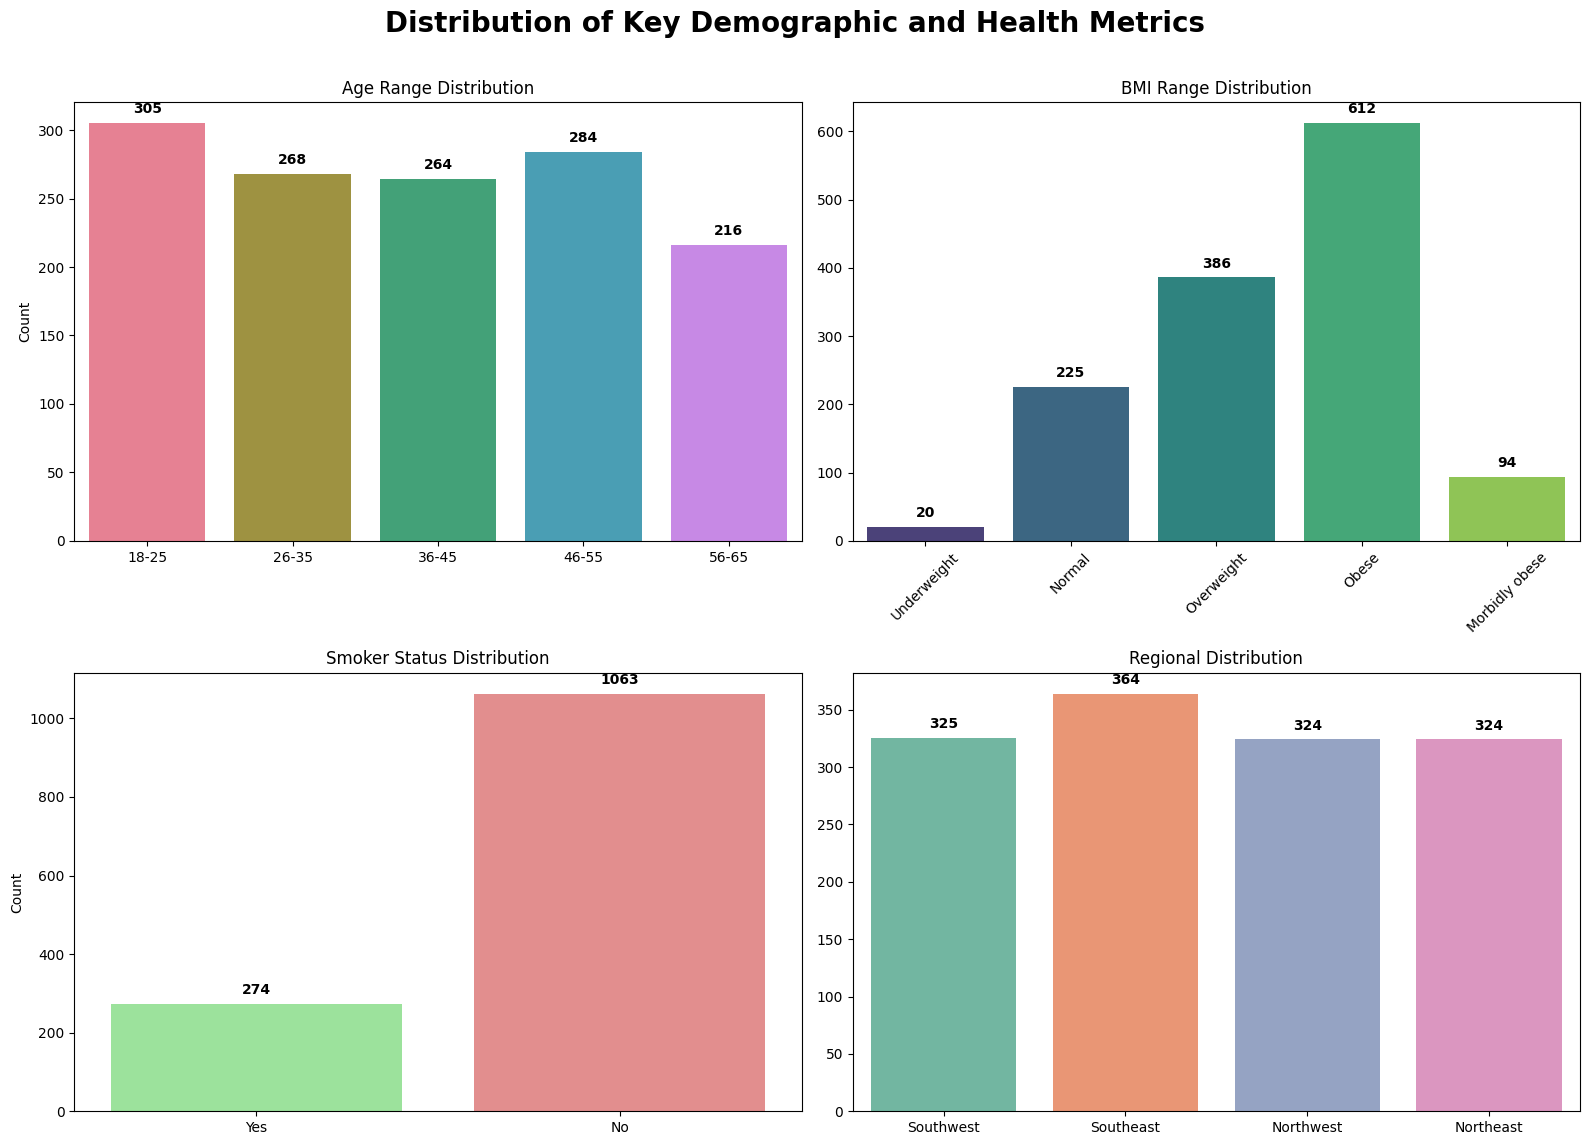

In [28]:
# Create one figure with a 2x2 grid of (4) subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Demographic and Health Metrics', fontsize=20, fontweight='bold')

# 1. Age Range Distribution
age_order = ['18-25', '26-35', '36-45', '46-55', '56-65']
sns.countplot(ax=axes[0, 0], data=df, x='Age range', order=age_order, palette='husl')
axes[0, 0].set_title('Age Range Distribution')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Count')

# 2. BMI Range Distribution
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Morbidly obese']
sns.countplot(ax=axes[0, 1], data=df, x='BMI Range', order=bmi_order, palette='viridis')
axes[0, 1].set_title('BMI Range Distribution')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Smoker Status Distribution
sns.countplot(ax=axes[1, 0], data=df, x='Smoker', palette=['lightgreen', 'lightcoral'])
axes[1, 0].set_title('Smoker Status Distribution')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Count')

# 4. Region Distribution
sns.countplot(ax=axes[1, 1], data=df, x='Region', palette='Set2')
axes[1, 1].set_title('Regional Distribution')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

# Add value labels to all subplots
for ax in axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontweight='bold', xytext=(0, 5), textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjusts boarder margins
plt.show()

## Visualisation 2

## Average charges of key demographic and health metrics
Includes subplots of:
- Age range average charges
- BMI range average charges
- Smoker status average charges
- Region average charges

C:\Users\diana\AppData\Local\Temp\ipykernel_18916\3474640307.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], data=df, x='Age range', y='Charges', estimator=np.mean, errorbar=None, order=age_order, palette='husl')
C:\Users\diana\AppData\Local\Temp\ipykernel_18916\3474640307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], data=df, x='BMI Range', y='Charges', estimator=np.mean, errorbar=None, order=bmi_order, palette='viridis')
C:\Users\diana\AppData\Local\Temp\ipykernel_18916\3474640307.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

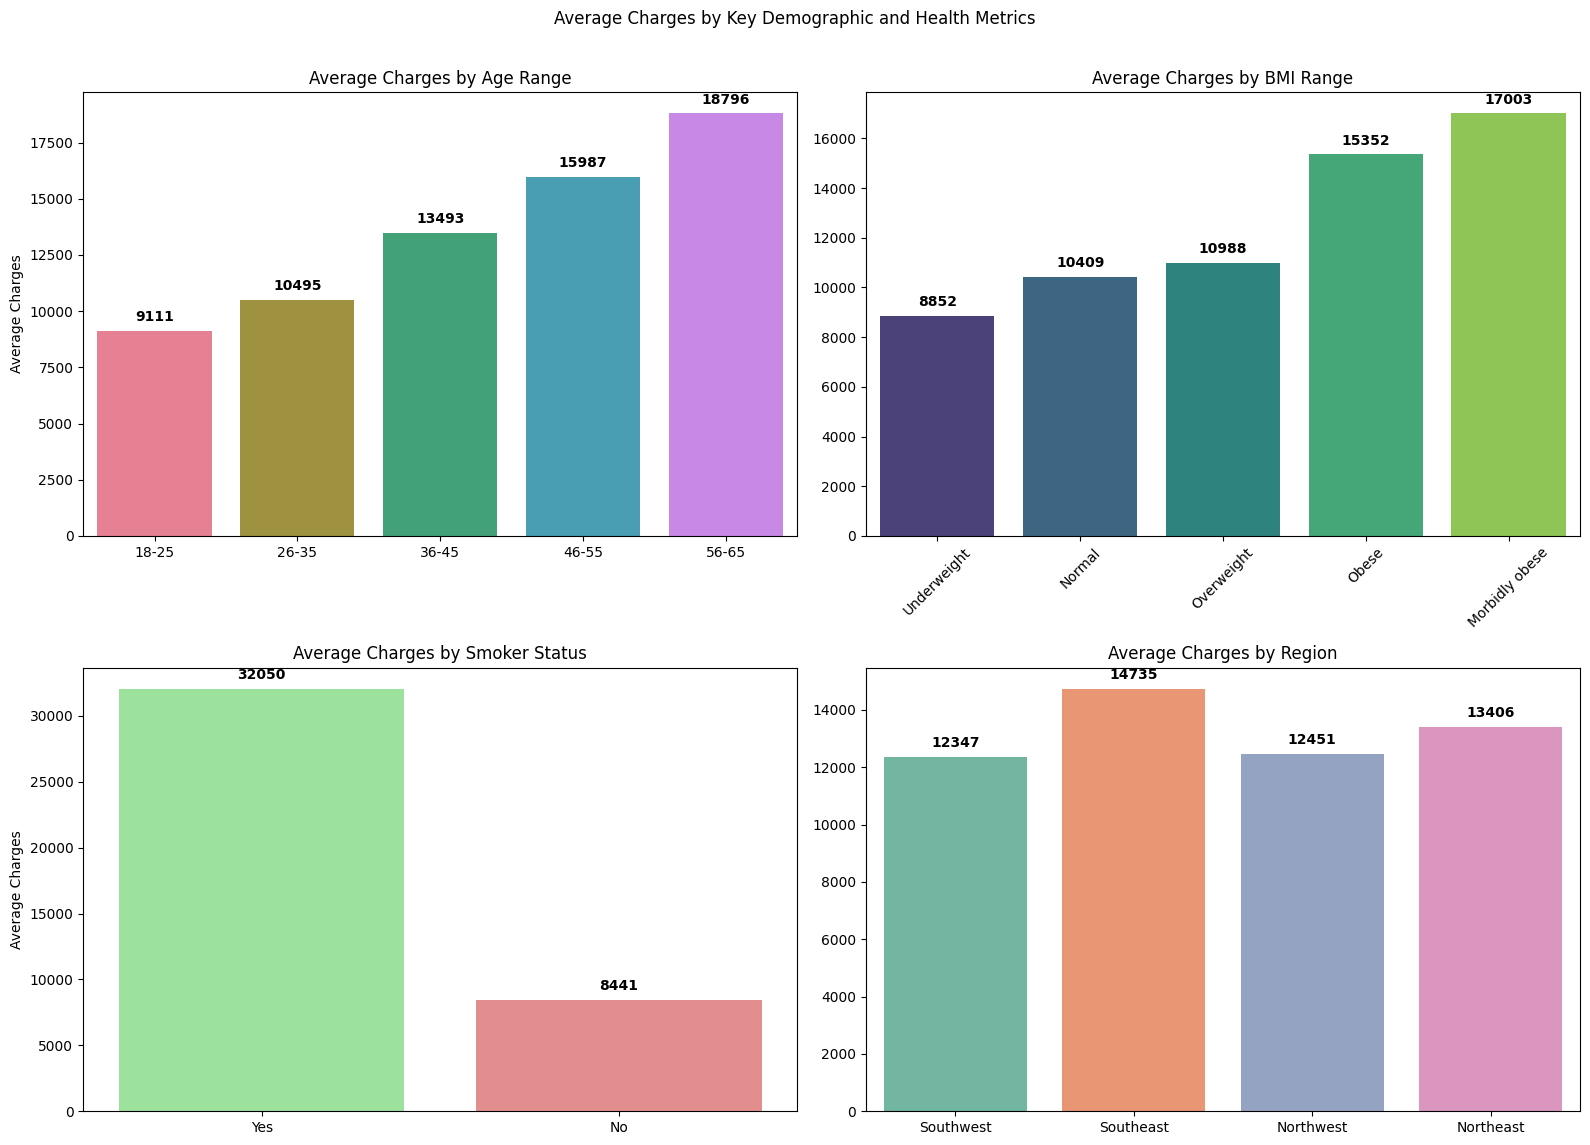

In [29]:
# Create one figure with a 2x2 grid of (4) subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Average Charges by Key Demographic and Health Metrics'),

# 1. Average Charges by Age Range
# Define the order based on the categories
age_order = ['18-25', '26-35', '36-45', '46-55', '56-65']
sns.barplot(ax=axes[0, 0], data=df, x='Age range', y='Charges', estimator=np.mean, errorbar=None, order=age_order, palette='husl')
axes[0, 0].set_title('Average Charges by Age Range')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Average Charges')

# 2. Average Charges by BMI Range
# Define the order for BMI categories
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Morbidly obese']
sns.barplot(ax=axes[0, 1], data=df, x='BMI Range', y='Charges', estimator=np.mean, errorbar=None, order=bmi_order, palette='viridis')
axes[0, 1].set_title('Average Charges by BMI Range')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Average Charges by Smoker Status
sns.barplot(ax=axes[1, 0], data=df, x='Smoker', y='Charges', estimator=np.mean, errorbar=None, palette=['lightgreen', 'lightcoral'])
axes[1, 0].set_title('Average Charges by Smoker Status')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Average Charges')

# 4. Average Charges by Region
sns.barplot(ax=axes[1, 1], data=df, x='Region', y='Charges', estimator=np.mean, errorbar=None, palette='Set2')
axes[1, 1].set_title('Average Charges by Region')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

# 3. Add value labels to all subplots
for ax in axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# 4. Final layout adjustment and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## Visualistion 3

## Box plot of charges by smoker status.

Confirming hypthesis 1 with clear visualisation that smokers incur higher charges

C:\Users\diana\AppData\Local\Temp\ipykernel_18916\1711784823.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Smoker', y='Charges', data=df, palette=smoker_palette)


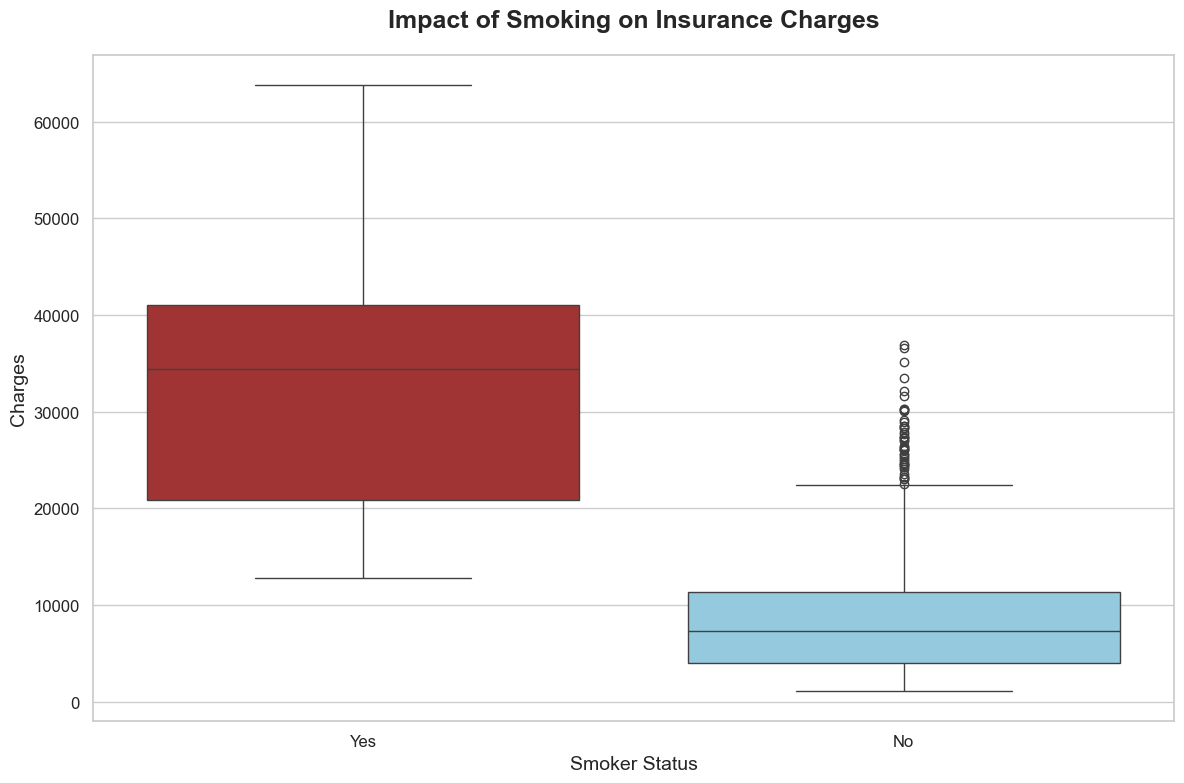

In [32]:
# Styling with specific color palette
sns.set_theme(style="whitegrid")
smoker_palette = {"Yes": "firebrick", "No": "skyblue"}

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Smoker', y='Charges', data=df, palette=smoker_palette)

# Add titles and labels
plt.title('Impact of Smoking on Insurance Charges', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Smoker Status', fontsize=14)
plt.ylabel('Charges', fontsize=14)

# Increase tick label size for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the graph
plt.tight_layout()
plt.show()

Visualisation

Age vs Charges scatter plot (with smoker legend)

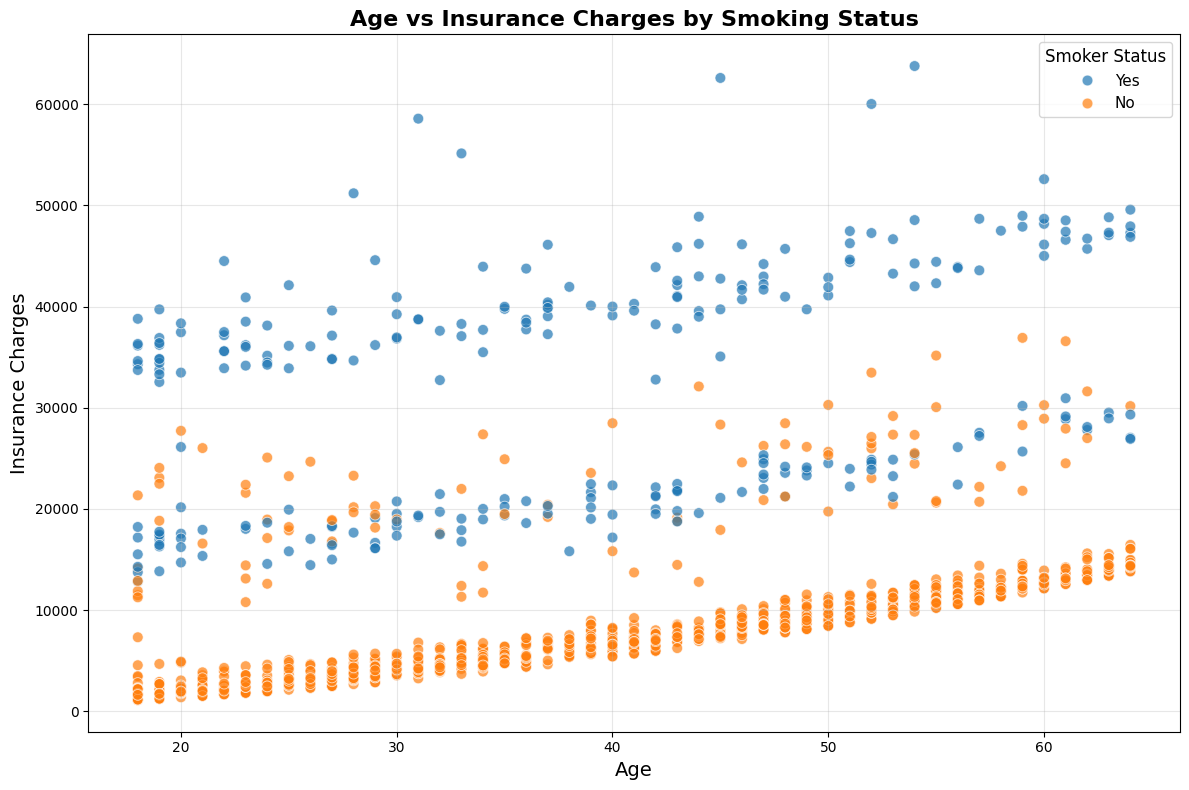

In [30]:
plt.figure(figsize=(12, 8))
# Create scatter plot with colors
sns.scatterplot(data=df, x='Age', y='Charges', hue='Smoker', alpha=0.7, s=60)
# Add title and labels
plt.title('Age vs Insurance Charges by Smoking Status', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.legend(title='Smoker Status', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Visualisation

BMI vs Charges scatter plot (with smoker legend)

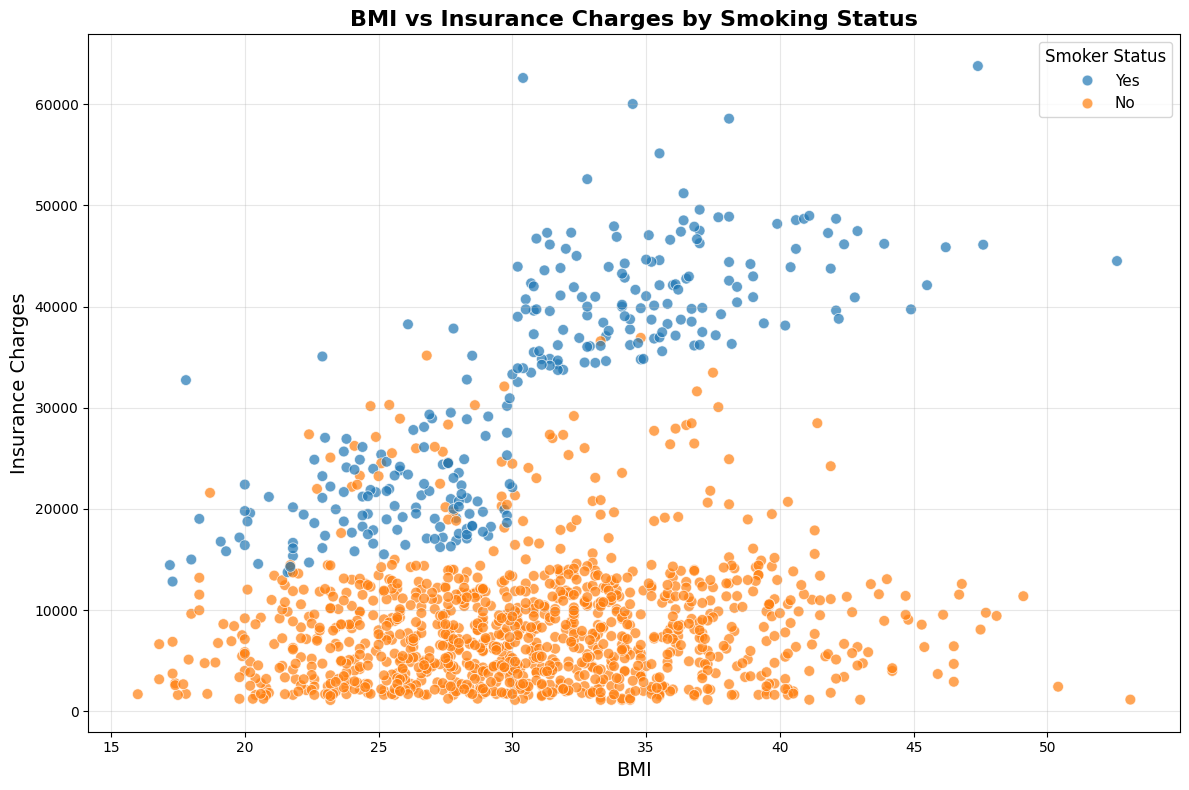

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='BMI', y='Charges', hue='Smoker', alpha=0.7, s=60)
plt.title('BMI vs Insurance Charges by Smoking Status', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)
plt.legend(title='Smoker Status', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Visualisation

Interactive BMI vs Charges scatter plot (with smoker legend)

In [ ]:
# Create an interactive scatter plot
# The 'size' parameter is used to represent Age

fig = px.scatter(
    df,
    x='BMI',
    y='Charges',
    color='Smoker',
    size='Age',  # Represent age by the size of the marker
    hover_data=['Age', 'Sex', 'Region'],
    title='Interactive Plot: BMI vs. Charges (Sized by Age)'
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed